In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import math
from numpy import trapz

In [162]:
indeces = []
neurons = {}
with open('../Data_3_Neurons/spike_data.txt') as data:
	for line in data:
		idx, spike_train = line.split('[')
		idx = int(idx[:len(idx)-2])
		indeces.append(idx)
		neurons[idx] = list(map(lambda x: float(x), spike_train[:len(spike_train)-2].split(',')))

nn5 = np.array(neurons[indeces[0]])
nn5 = nn5.round(0)
nn6 = np.array(neurons[indeces[1]])
nn6 = nn6.round(0)
nn7 = np.array(neurons[indeces[2]])
nn7 = nn7.round(0)

8.0 499.0


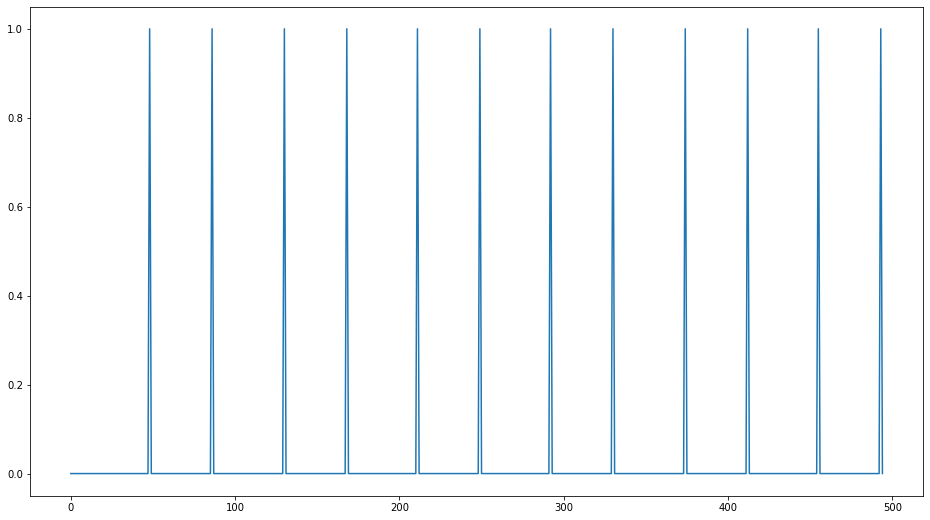

In [163]:
Start_time = min(nn5[0], nn6[0], nn7[0])
End_time = max(nn5[-1], nn6[-1], nn7[-1])
print(Start_time, End_time)
time_grid = np.arange(Start_time-2, End_time+2, 1)
time_grid = np.round(time_grid,0)

tmp5 = np.histogram(nn5,bins=int(End_time-Start_time+4),range=(Start_time-2, End_time+2))
tmp6 = np.histogram(nn6,bins=int(End_time-Start_time+4),range=(Start_time-2, End_time+2))
tmp7 = np.histogram(nn7,bins=int(End_time-Start_time+4),range=(Start_time-2, End_time+2))

neuron5 = tmp5[0]
neuron6 = tmp6[0]
neuron7 = tmp7[0]

plt.figure(figsize=(16,9))
plt.plot(neuron7)

In [164]:
N5 = nn5.shape[0]
N6 = nn6.shape[0]
N7 = nn7.shape[0]

In [165]:
corr56temp = signal.correlate(neuron5, neuron6, mode='same', method='fft')
#plt.plot(corr56temp)
#print(signal.correlation_lags(len(neuron5), len(neuron6)))

corr56 = abs(corr56temp).max()
corr57temp = signal.correlate(neuron5, neuron7, mode='same', method='fft')
corr57 = abs(corr57temp).max()
corr67temp = signal.correlate(neuron6, neuron7, mode='same', method='fft')
corr67 = abs(corr67temp).max()
corr76temp = signal.correlate(neuron7, neuron6, mode='same', method='fft')
corr76 = abs(corr76temp).max()
corr75temp = signal.correlate(neuron7, neuron5, mode='same', method='fft')
corr75 = abs(corr75temp).max()
corr65temp = signal.correlate(neuron6, neuron5, mode='same', method='fft')
corr65 = abs(corr65temp).max()
corr55temp = signal.correlate(neuron5, neuron5, mode='same', method='fft')
corr55 = abs(corr55temp).max()
corr66temp = signal.correlate(neuron6, neuron6, mode='same', method='fft')
corr66 = abs(corr66temp).max()
corr77temp = signal.correlate(neuron7, neuron7, mode='same', method='fft')
corr77 = abs(corr77temp).max()

scaled_corr56 = corr56temp/math.sqrt(corr55*corr66)
sc_corr56 = abs(scaled_corr56).max()
scaled_corr65 = corr65temp/math.sqrt(corr55*corr66)
sc_corr65 = abs(scaled_corr65).max()
scaled_corr67 = corr67temp/math.sqrt(corr77*corr66)
sc_corr67 = abs(scaled_corr67).max()
scaled_corr76 = corr76temp/math.sqrt(corr77*corr66)
sc_corr76 = abs(scaled_corr76).max()
scaled_corr57 = corr57temp/math.sqrt(corr55*corr77)
sc_corr57 = abs(scaled_corr57).max()
scaled_corr75 = corr75temp/math.sqrt(corr55*corr77)
sc_corr75 = abs(scaled_corr75).max()
scaled_corr55 = corr55temp/math.sqrt(corr55*corr55)
sc_corr55 = abs(scaled_corr55).max()
scaled_corr66 = corr66temp/math.sqrt(corr66*corr66)
sc_corr66 = abs(scaled_corr66).max()
scaled_corr77 = corr77temp/math.sqrt(corr77*corr77)
sc_corr77 = abs(scaled_corr77).max()


In [166]:
correlation_mat = [corr55, corr56, corr57, corr65, corr66, corr67, corr75, corr76, corr77]
correlation_mat = np.array(correlation_mat)
correlation_mat = correlation_mat.reshape(3,3)
print(correlation_mat)


sc_correlation_mat = [sc_corr55, sc_corr56, sc_corr57, sc_corr65, sc_corr66, sc_corr67, sc_corr75, sc_corr76, sc_corr77]
sc_correlation_mat = np.array(sc_correlation_mat)
sc_correlation_mat = sc_correlation_mat.reshape(3,3)
print(sc_correlation_mat)

[[67 14  6]
 [14 24  9]
 [ 6  9 12]]
[[1.         0.34912827 0.21160368]
 [0.34912827 1.         0.53033009]
 [0.21160368 0.53033009 1.        ]]


In [167]:
# computing FFT
def fft_signal(array, sampling):
    
    Xf_mag = np.abs(np.fft.fft(array))
    freqs = np.fft.rfftfreq(len(Xf_mag), d=1.0/sampling)

    #taking half of the data (same in negative)
    Xf_mag_temp = Xf_mag
    freqs_temp = freqs
    
    return freqs_temp, Xf_mag_temp

In [168]:
f56,m56= fft_signal(scaled_corr56,1000)
f65,m65= fft_signal(scaled_corr65,1000)
f57,m57= fft_signal(scaled_corr57,1000)
f75,m75= fft_signal(scaled_corr75,1000)
f67,m67= fft_signal(scaled_corr67,1000)
f76,m76= fft_signal(scaled_corr76,1000)
f55,m55= fft_signal(neuron5,1000)
f66,m66= fft_signal(neuron6,1000)
f77,m77= fft_signal(neuron7,1000)

In [169]:
S56_c = (m56**2)-(m57**2)*(m67**2)/(m77**2)
S65_c = (m65**2)-(m67**2)*(m57**2)/(m77**2)
S57_c = (m57**2)-(m56**2)*(m67**2)/(m66**2)
S75_c = (m75**2)-(m76**2)*(m65**2)/(m66**2)
S67_c = (m67**2)-(m65**2)*(m56**2)/(m55**2)
S76_c = (m76**2)-(m75**2)*(m57**2)/(m55**2)

In [170]:
corr56_c = np.fft.ifft(S56_c)
corr65_c = np.fft.ifft(S65_c)
corr57_c = np.fft.ifft(S57_c)
corr75_c = np.fft.ifft(S75_c)
corr67_c = np.fft.ifft(S67_c)
corr76_c = np.fft.ifft(S76_c)

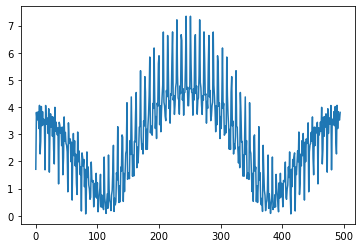

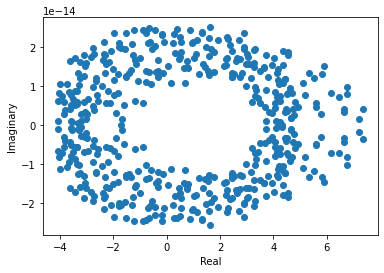

In [185]:
hehe = corr56_c.copy()
#print(hehe)
plt.plot(abs(hehe))
plt.savefig("3NeuronsCorr56.png")
plt.show()


# extract real part
x = [ele.real for ele in hehe]
# extract imaginary part
y = [ele.imag for ele in hehe]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()


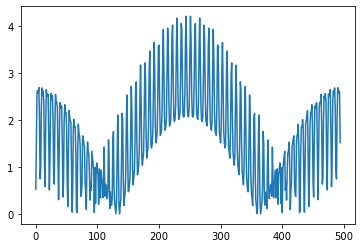

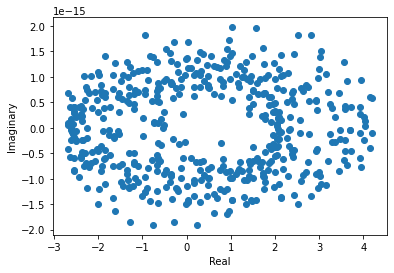

In [186]:
hehe = corr57_c.copy()
plt.plot(abs(hehe))
plt.savefig("3NeuronsCorr57.png")
plt.show()

# extract real part
x = [ele.real for ele in hehe]
# extract imaginary part
y = [ele.imag for ele in hehe]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

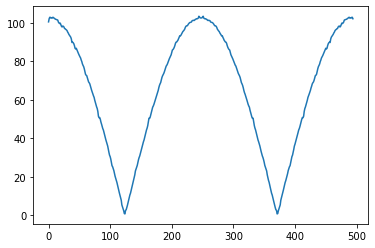

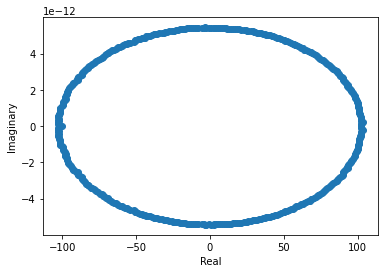

In [187]:
hehe = corr67_c.copy()
plt.plot(abs(hehe))
plt.savefig("3NeuronsCorr67.png")
plt.show()

# extract real part
x = [ele.real for ele in hehe]
# extract imaginary part
y = [ele.imag for ele in hehe]
  
# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

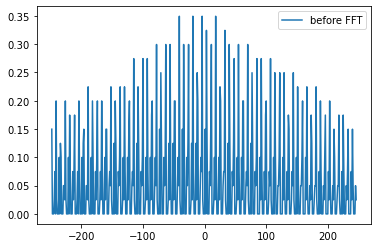

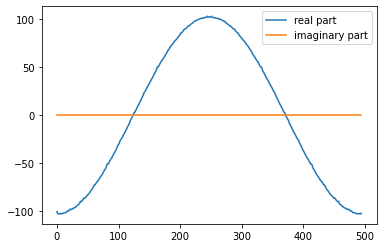

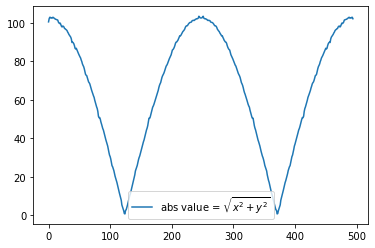

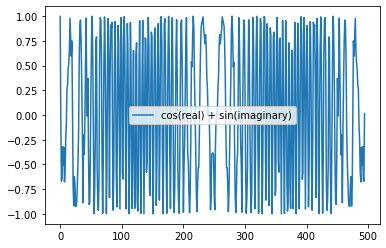

In [174]:
x_axis = np.arange(-scaled_corr67.shape[0]//2,scaled_corr67.shape[0]//2, 1)
plt.plot(x_axis,scaled_corr56, label='before FFT')
plt.legend()
plt.show()

plt.plot(x, label='real part')
plt.plot(y, label='imaginary part')
plt.legend()
plt.show()

plt.plot(abs(hehe), label = 'abs value = $\sqrt{x^2 + y^2}$')
plt.legend()
plt.show()
plt.plot(np.cos(x) + np.sin(y), label='cos(real) + sin(imaginary)')
plt.legend()
plt.show()

In [175]:
scaled_corr56_c = corr56_c/math.sqrt(corr55*corr66)
sc_corr56_c = abs(scaled_corr56_c).max()



scaled_corr65_c = corr65_c/math.sqrt(corr55*corr66)
sc_corr65_c = abs(scaled_corr65_c).max()
scaled_corr67_c = corr67_c/math.sqrt(corr77*corr66)
sc_corr67_c = abs(scaled_corr67_c).max()
scaled_corr76_c = corr76_c/math.sqrt(corr77*corr66)
sc_corr76_c = abs(scaled_corr76_c).max()
scaled_corr57_c = corr57_c/math.sqrt(corr55*corr77)
sc_corr57_c = abs(scaled_corr57_c).max()
scaled_corr75_c = corr75_c/math.sqrt(corr55*corr77)
sc_corr75_c = abs(scaled_corr75).max()

sc_corr55_c = 1
sc_corr66_c = 1
sc_corr77_c = 1

sc_correlation_mat = [sc_corr55_c, sc_corr56_c, sc_corr57_c, 
                      sc_corr65_c, sc_corr66_c, sc_corr67_c, 
                      sc_corr75_c, sc_corr76_c, sc_corr77_c]
sc_correlation_mat = np.array(sc_correlation_mat)
sc_correlation_mat = sc_correlation_mat.reshape(3,3)
sc_correlation_mat = np.round(sc_correlation_mat,1)
print(sc_correlation_mat)

[[1.  0.2 0.1]
 [0.2 1.  6.1]
 [0.2 1.6 1. ]]


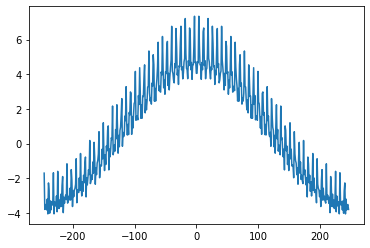

In [176]:
xlim = corr67_c.shape[0]//2
x = np.arange(-xlim,xlim+1,1)
plt.plot(x,corr56_c.real)
#plt.plot(corr56temp)

In [177]:
def coin(array):
    array_near0 = array[array.shape[0]//2 - 25: array.shape[0]//2 + 25]
    area_near0 = trapz(array_near0, dx=1)
    area_whole = trapz(array, dx=1)

    coincidence = area_near0/area_whole
    return coincidence

In [178]:
coin56 = coin(corr56_c)
x56 = abs(coin56)
coin65 = coin(corr65_c)
x65 = abs(coin65)
coin57 = coin(corr57_c)
x57 = abs(coin57)
coin75 = coin(corr75_c)
x75 = abs(coin75)
coin67 = coin(corr67_c)
x67 = abs(coin67)
coin76 = coin(corr76_c)
x76 = abs(coin76)
coin55 = 1
coin66 = 1
coin77 = 1

In [179]:
coin_mat = [coin55, x56, x57, x65, coin66, x67, x75, x76, coin77]
coin_mat = np.array(coin_mat)
coin_mat = coin_mat.reshape(3,3)
print(coin_mat)

[[ 1.          0.59924267  0.6759064 ]
 [ 0.59924267  1.         62.4754113 ]
 [ 0.6759064   9.18628183  1.        ]]


(array([80., 62., 51., 42., 52., 42., 58., 74., 20., 14.]),
 array([-0.10130863, -0.07286865, -0.04442867, -0.01598869,  0.01245128,
         0.04089126,  0.06933124,  0.09777122,  0.1262112 ,  0.15465118,
         0.18309115]),
 <BarContainer object of 10 artists>)

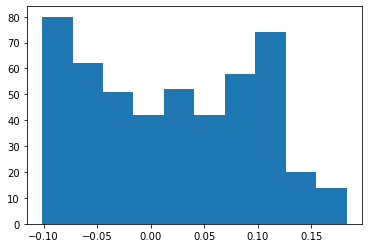

In [180]:
histo = np.histogram(scaled_corr56_c.real)
plt.hist(scaled_corr56_c.real)

In [181]:
def details(spike1, spike2, bin_width, hist):
    
    d = hist[0].max()
    B = (spike1 * spike2*bin_width)/Duration
    vis = d/B
    conn = np.log(1+vis)
    sd = np.sqrt(B)
    detect = d/sd 
    
    return vis, conn, detect

49


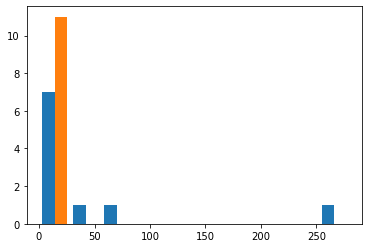

In [182]:
histo = np.histogram(scaled_corr65.real)
plt.hist(histo)
bin_width=scaled_corr65.shape[0]//histo[0].shape[0]
print(bin_width)
Duration = End_time
spike_num5 = nn5.shape[0]
spike_num6 = nn6.shape[0]
spike_num7 = nn7.shape[0]

avg_fire_rate5 = spike_num5/Duration
avg_fire_rate6 = spike_num6/Duration
avg_fire_rate7 = spike_num7/Duration

In [183]:
vis, conn, detect = details(spike_num6, spike_num5, bin_width, histo)
print('detectability: ', detect)
print('visibility: ', vis)
print('connectivity: ', conn)

detectability:  22.28267068677638
visibility:  1.7732764747690122
connectivity:  1.0200294640686676
